In [1]:
# !pip install matplotlib seaborn

In [2]:
# !pip install nltk

In [3]:
import pandas as pd

test = pd.read_csv("test_data.csv")
test.head()

,SENTENCES,MEANING,en_ur_2b_bl,ur_en_2b_bl,en_ur_2b_ft,ur_en_2b_ft
0,Ambiance was amazing and so the staff. Quality...,ماحول حیرت انگیز تھا اور عملہ بھی۔ کھانے کا مع...,فضاء بہت خوب تھا اورservants بھی بہت خوب تھے۔ ...,"It was quite surprising, the atmosphere and th...",اچھا ماحول تھا اور عملہ بھی۔ کھانے کا معیار بھ...,Ambiance was amazing and so was the staff.\n ...
1,You have to promise never to tell anyone what ...,تم نے وعدہ کرنا ہے کہ جو میں تمہیں بتانے لگا ہ...,آپ کو یہ کہنا پڑے گا کہ میں یہ کہنے والا نہیں ...,"I promise that whatever I tell you, I will nev...",تمہیں مجھے بتانے سے پہلے کبھی کسی کو وعدہ کرنا...,You must promise not to tell anyone what I tel...
2,Good place with average food quality,کھانے کے اوسط معیار کے ساتھ اچھی جگہ,خوبہ مکمل غذای میان,Good place with average food.,اوسط کھانے کے معیار کے ساتھ اچھی جگہ\n <end...,Good place with average food quality\n <end...
3,And he lifted his father and mother upon the t...,(شہر میں داخل ہونے کے بعد) اس نے اپنے والدین ک...,وہ اپنے پڑھیاں اور مہم کی چھڑی پر چڑھ لیا، اور...,"After entering the city, he picked up his pare...",11|10|اور اُس نے اپنے باپ اور ماں کو تخت پر بٹ...,"He took his parents by the hand, and set them ..."
4,What a great place for family safe zone,فیملی سیف زون کے لیے کتنی اچھی جگہ ہے۔,یہ ایک عائلی محفوظ گھڑی ہے,"""This is a good place for the family.""",None\n <end_of_turn>\n,What a nice place for family safe zone\n <e...


# BLEU score

In [4]:
from nltk.translate.bleu_score import sentence_bleu
from tqdm import tqdm

reference = "Good place with average food quality".split()
candidate = "Good place with average quality".split()
print(reference)
score = sentence_bleu([reference], candidate)
print(score)

['Good', 'place', 'with', 'average', 'food', 'quality']
0.5789300674674098


In [5]:
from nltk.translate.bleu_score import sentence_bleu
from tqdm import tqdm
import re

scores = []
# Define the column you want to process and modify
for index, row in tqdm(test.iterrows()):
    try:
        reference = re.sub(r'[^\w\s]', '', row["MEANING"]).split() 

        candidate = re.sub(r'[^\w\s]', '', row["en_ur_2b_bl"]).split()

        score = sentence_bleu([reference], candidate)
        scores.append(score)
    except:
        print(candidate)

#     test.at[index, 'en_ur_2b_bl_bleu'] = score

0it [00:00, ?it/s]/workspace/venv/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/workspace/venv/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/workspace/venv/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use Smoo

['غذای', 'کی', 'مذاق', 'مناسب', 'نہیں', 'ہے']
['خوب', 'مکان', 'خوب', 'غذا', 'لیکن', 'مقدار', 'کم']
['yesterday', 'میں', 'یہ', 'شال', 'خریدا']
['خوبہ', 'ambient', 'زیادہ', 'کے', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین', 'عین']
['نامی', 'کے', 'مطابق', 'اور', 'پہلے', 'سے', 'تجربات', 'کے', 'مطابق']
['محبت', 'کی', 'غذا']
['مخنی', 'چیکن', 'ہر', 'کھان', 'میں', 'بہتر', 'ہے', 'پے', 'پڑھنے', 'کے', 'قیمتی']
['پھولنے', 'والا']
['اس', 'کا', 'تذکر', 'بہت', 'اچھا', 'ہے', 'میں', 'اسے', 'محبت', 'کرتا', 'ہوں', 'لیکن', 'کھڑی', 'ہوا', 'کے', 'لیے', 'ایک', 'بہت', 'ہی', 'معمولی', 'atmospher', 'ہے']
['دپٹی', 'کے', 'جرم', 'اور', 'مجرموں', 'کے', 'علم', 'کے', 'ساتھ', 'young', 'man', 'کی', 'ہر', 'کلم', 'پر', 'وہ', 'اس', 'کی', 'صحت', 'پر', 'یقین', 'کر', 'رہا', 'تھا']
['کے', 'بہترین', 'تذکیر']
[

In [6]:
import statistics
statistics.mean(scores)

0.015023230249557314

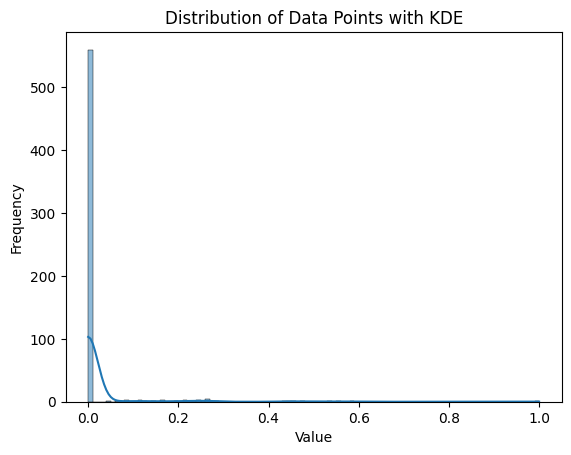

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data points
data_points = scores
# Plot a distribution using seaborn
sns.histplot(data_points, bins=100, kde=True)

# Adding labels and title
plt.title('Distribution of Data Points with KDE')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [8]:
max(scores)

1.0

In [9]:
len(scores)

592

In [10]:
test.columns

Index(['SENTENCES ', 'MEANING', 'en_ur_2b_bl', 'ur_en_2b_bl', 'en_ur_2b_ft',
       'ur_en_2b_ft'],
      dtype='object')

In [11]:
from nltk.translate.bleu_score import sentence_bleu
from tqdm import tqdm

scores = []
# Define the column you want to process and modify
for index, row in tqdm(test.iterrows()):
    try:
        reference = re.sub(r'[^\w\s]', '', row["SENTENCES "]).split() 

        candidate = re.sub(r'[^\w\s]', '', row["ur_en_2b_bl"]).split()


        score = sentence_bleu([reference], candidate)
        scores.append(score)
    except:
        print(candidate)

#     test.at[index, 'en_ur_2b_bl_bleu'] = score

0it [00:00, ?it/s]/workspace/venv/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/workspace/venv/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/workspace/venv/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use Smoo

['Eat', 'food']


In [12]:
import statistics
statistics.mean(scores)

0.07307238475398786

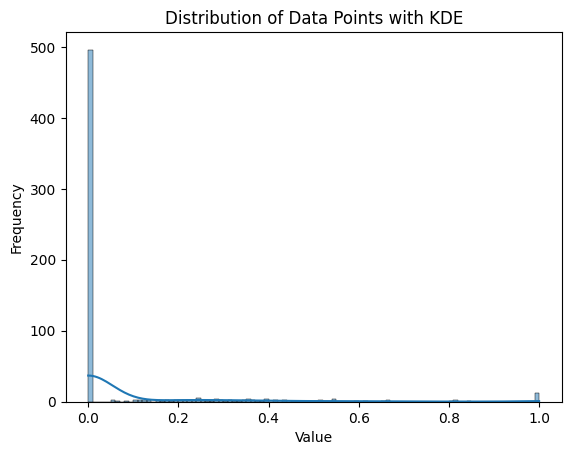

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data points
data_points = scores
# Plot a distribution using seaborn
sns.histplot(data_points, bins=100, kde=True)

# Adding labels and title
plt.title('Distribution of Data Points with KDE')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Finetune Eval en-ur

In [14]:
from nltk.translate.bleu_score import sentence_bleu
from tqdm import tqdm
import re

scores = []
# Define the column you want to process and modify
for index, row in tqdm(test.iterrows()):
    try:
        reference = re.sub(r'[^\w\s]', '', row["MEANING"]).split() 

#         candidate = re.sub(r'[^\w\s]', '', row["en_ur_2b_ft"]).split()
        candidate = re.sub(r'[^\w\s]', '', row["en_ur_2b_ft"].replace('\n ', '').replace(' \n', '').replace('\n', '').replace('<end_of_turn>', '')).split()


        score = sentence_bleu([reference], candidate)
        scores.append(score)
    except:
        print(candidate)

#     test.at[index, 'en_ur_2b_bl_bleu'] = score

0it [00:00, ?it/s]/workspace/venv/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/workspace/venv/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/workspace/venv/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use Smoo

['None']
['اچھی', 'جگہ', 'اچھا', 'کھانا', 'لیکن', 'مقدار', 'کے', 'لحاظ', 'سے', 'کم']
['میں', 'نے', 'کل', 'اس', 'سٹیک', 'خریدا']
['اچھا', 'ماحول', 'بہترین', 'معیار', 'اقتصادی']
['None']
['بہت', 'اچھا', 'کھانا']
['مچھنی', 'چکن', 'اچھے', 'تمام', 'پکوان', 'ہیں', 'جو', 'پیسے', 'کے', 'قابل', 'ہیں']
['مگر', 'بھولو']
['None']
['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None']
['بہترین', 'ذائقہ']
['لڑکے', 'کے', 'کھانے', 'بہت', 'اچھے', 'تھے', 'ہر', 'چیز', 'کا', 'ذائقہ', 'بالکل', 'ٹھیک', 'ہے', 'ان', 'کے', 'جو', 'چٹنیاں', 'ڈالتے', 'ہیں', 'وہ', 'غیر', 'معمولی', 'ہیں', 'چوتھائی', 'چکن', 'کی', 'سرونگ', 'کا', 'سائز', 'تھوڑا', 'مایوس', 'کن', 'ہے', 'مجموعی', 'طور', 'پر', 'اچھا', 'تجربہ']


In [15]:
import statistics
statistics.mean(scores)

0.2042004950801084

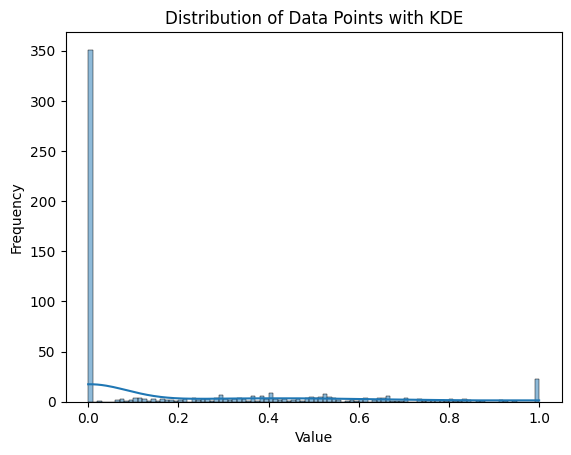

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data points
data_points = scores
# Plot a distribution using seaborn
sns.histplot(data_points, bins=100, kde=True)

# Adding labels and title
plt.title('Distribution of Data Points with KDE')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Finetune eval ur_en

In [18]:
from nltk.translate.bleu_score import sentence_bleu
from tqdm import tqdm

scores = []
# Define the column you want to process and modify
for index, row in tqdm(test.iterrows()):
    try:
        reference = re.sub(r'[^\w\s]', '', row["SENTENCES "]).split() 

        candidate = re.sub(r'[^\w\s]', '', row["ur_en_2b_ft"].replace('\n ', '').replace(' \n', '').replace('\n', '').replace('<end_of_turn>', '')).split()


        score = sentence_bleu([reference], candidate)
        scores.append(score)
    except:
        print(candidate)

#     test.at[index, 'en_ur_2b_bl_bleu'] = score

0it [00:00, ?it/s]/workspace/venv/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/workspace/venv/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/workspace/venv/lib/python3.11/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use Smoo

['Awesome', 'food']


In [19]:
import statistics
statistics.mean(scores)

0.25118298661050187

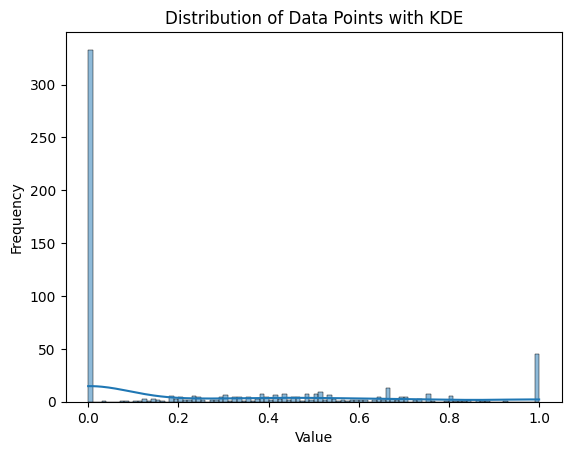

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data points
data_points = scores
# Plot a distribution using seaborn
sns.histplot(data_points, bins=100, kde=True)

# Adding labels and title
plt.title('Distribution of Data Points with KDE')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()